# Task-6 : Netflix Data Analysis

# Description-
In this Netflix data analysis, we aim to explore and uncover insights from various aspects of the content 
catalog, such as genres, language distribution, IMDb scores, release dates, and runtime. By performing exploratory data 
analysis (EDA), we can identify trends in popular genres, analyze audience preferences across different regions and languages,
and examine how IMDb ratings vary across genres and years. This analysis helps us understand what type of content performs well,
predict trends, and provide data-backed recommendations for content strategy. Ultimately, these insights support decision-making
on content acquisition, production, and personalized user experiences.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets
df=pd.read_csv("C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\Netflix.csv")

In [3]:
df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


In [5]:
#Generating descriptive Statistics
df.describe()

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


In [6]:
#Checking for null values
df.isna().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

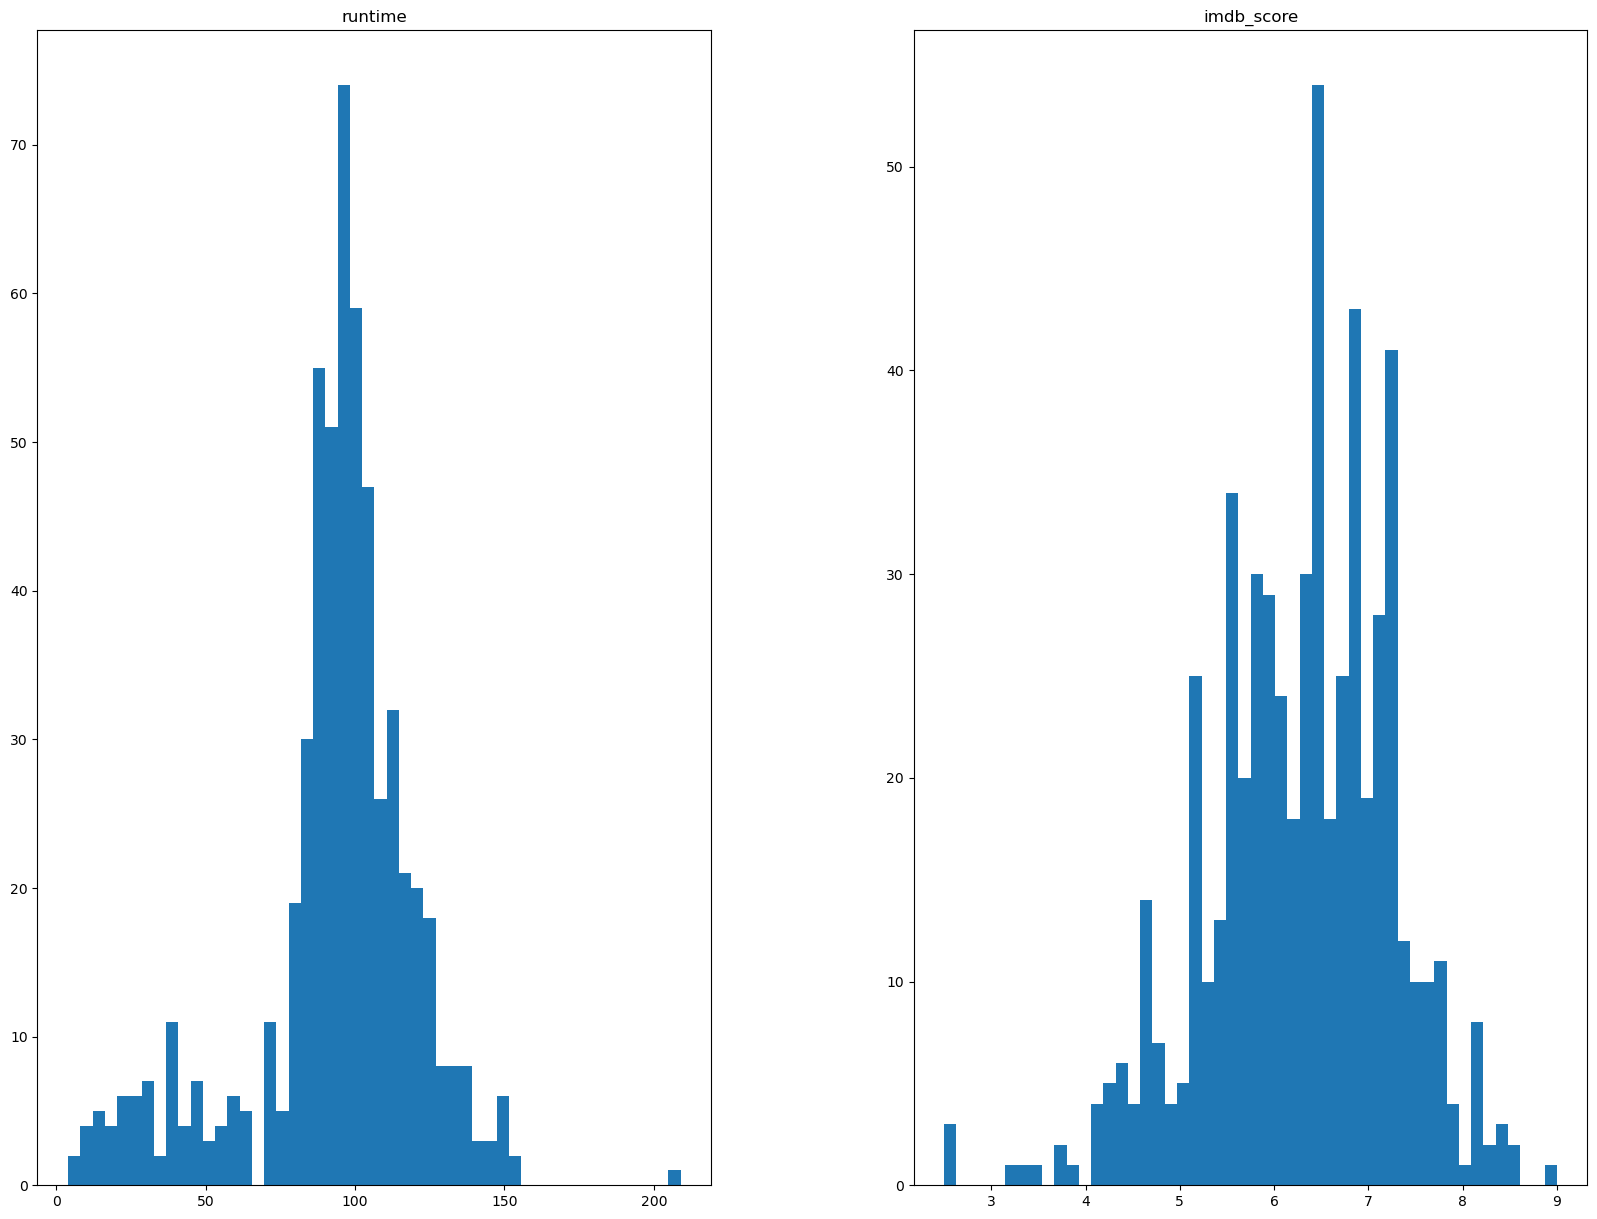

In [7]:
# plotting histogram of Continuous Columns
df[['runtime', 'imdb_score']].hist(bins=50, grid=False, figsize=(20, 15))
plt.show()

# Questions :

### 1) What are the top 10 most popular genres on Netflix?

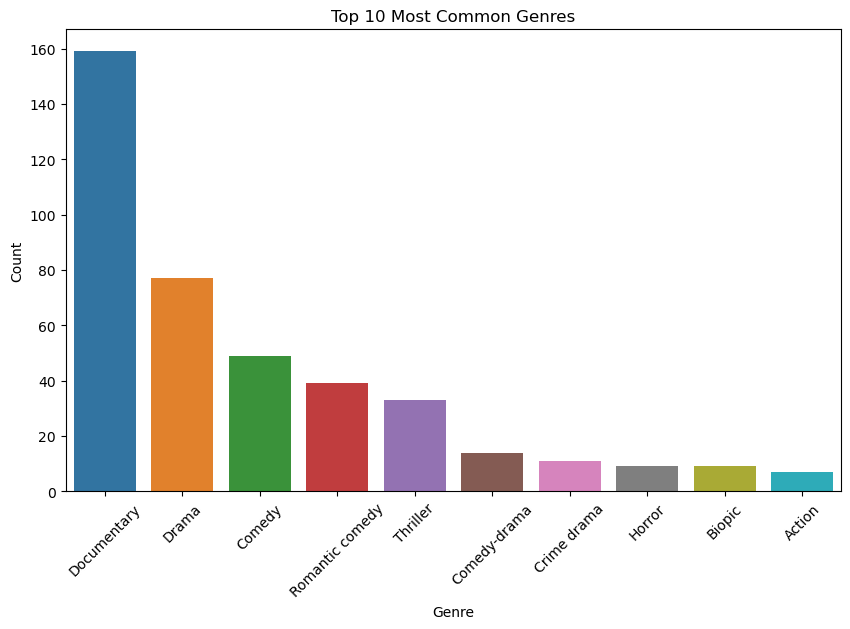

In [8]:
# Count movies per genre
genre_counts = df['genre'].value_counts()
# Plot the top genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
# Save the plot as an image
plt.savefig('C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\top_10_genres.png', bbox_inches='tight') 
plt.show()

### Insights-

This analysis reveals Netflix's strategy of diversifying content across genres that emphasize emotional engagement (Drama), 
real-world learning (Documentary), and entertainment (Comedy). While Action and Biopic films have a smaller footprint.

### 2) What are the top 5 movies with the highest IMDb scores? ?

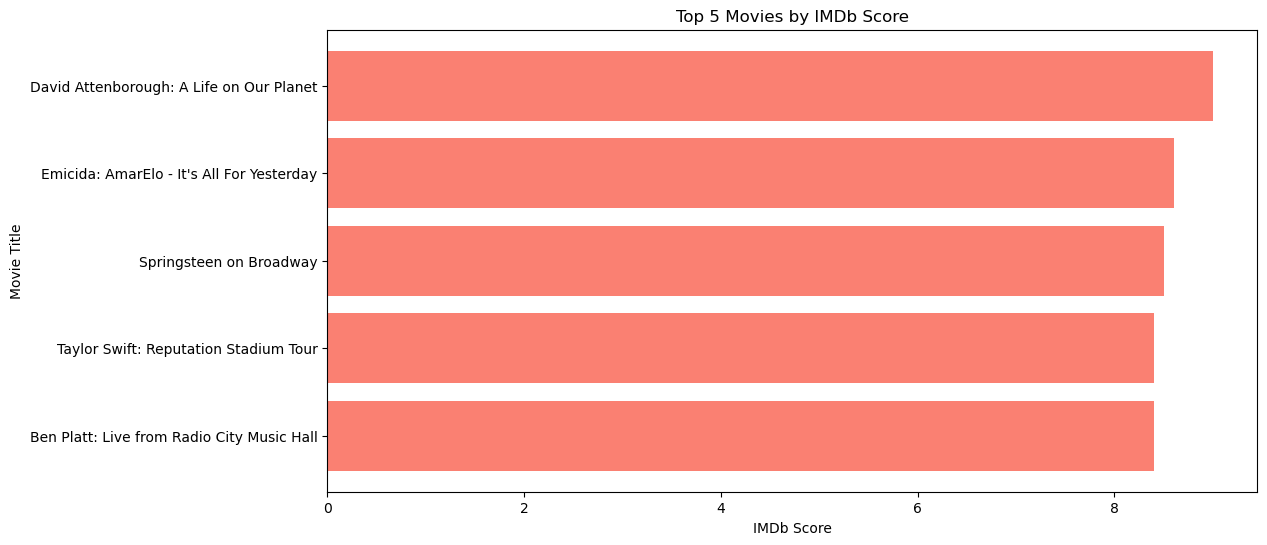

In [9]:
top_5_movies = df[['title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(5)
# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_5_movies['title'], top_5_movies['imdb_score'], color='salmon')
plt.title('Top 5 Movies by IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score at top
plt.savefig('C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\top_5_movies.png', bbox_inches='tight') 
plt.show()

### Insights-

David Attenborough: A Life on Our Planet is categorized as a documentary has got highest ratings 9 out of 10

### 3) What are the most common languages available on Netflix?

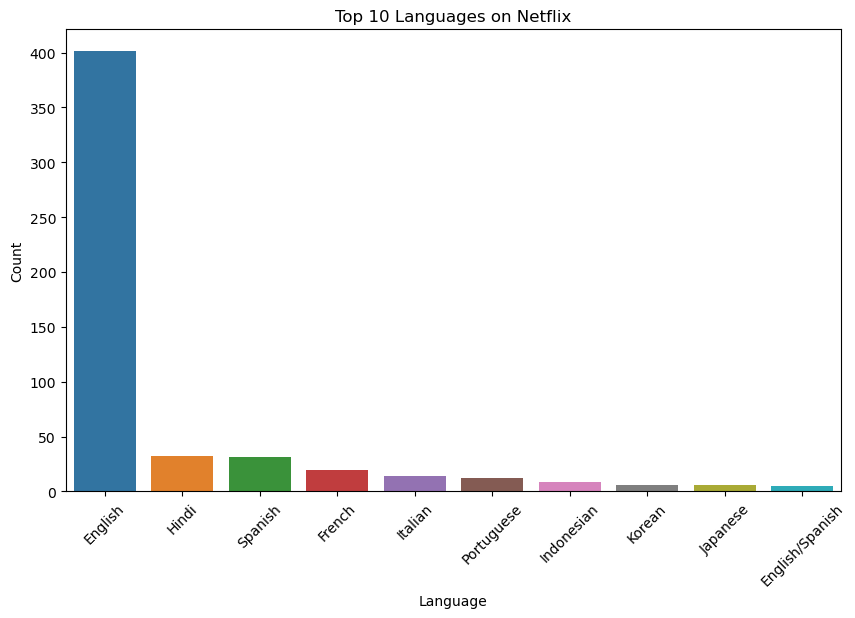

In [20]:
# Count movies per language
language_counts = df['language'].value_counts()
# Plot the top languages
plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.index[:10], y=language_counts.values[:10])
plt.title("Top 10 Languages on Netflix")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig('C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\Common_languages.png', bbox_inches='tight') 
plt.show()

### Insights-

English emerges as the most prevalent language across Netflix’s movie library and Spanish ranks as the least common language.

### 4) Which languages have the highest-rated content?

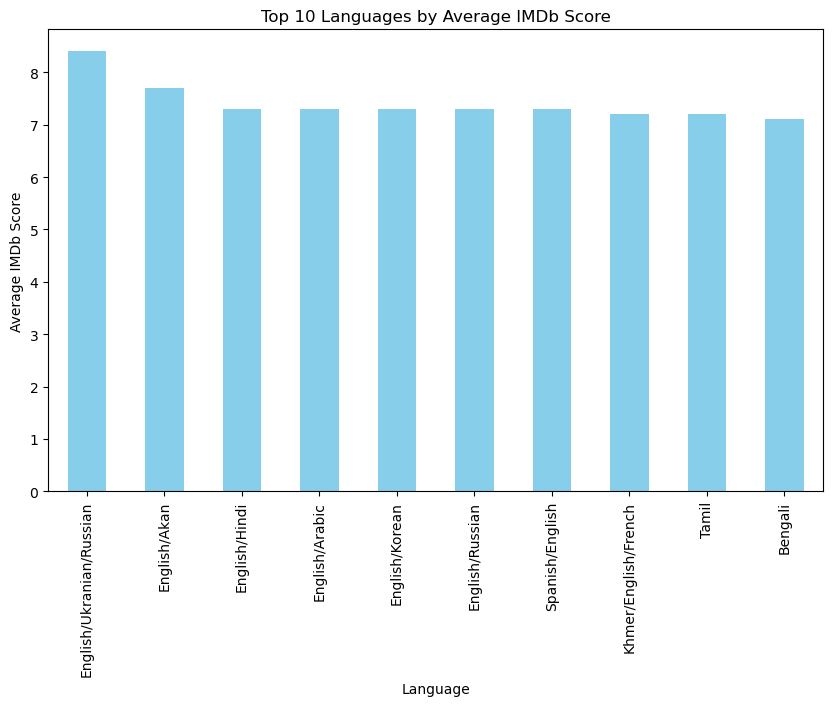

In [21]:
# Average IMDb score by language
language_scores = df.groupby('language')['imdb_score'].mean().sort_values(ascending=False)
# Plot IMDb scores by language
plt.figure(figsize=(10,6))
language_scores[:10].plot(kind='bar', color='skyblue')
plt.title("Top 10 Languages by Average IMDb Score")
plt.xlabel("Language")
plt.ylabel("Average IMDb Score")
plt.savefig('C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\language_IMDB_scores.png', bbox_inches='tight') 
plt.show()

### Insights-
An analysis of the IMDb ratings across various languages reveals intriguing trends about the content quality on Netflix. 
While English, Ukrainian, and Russian languages boast some of the highest average IMDb scores, Bengali stands out with the
lowest average score in the Netflix dataset. This insight provides a glimpse into how language influences the reception and 
perception of content globally.

### 5) How has the number of movies released per year changed over time?

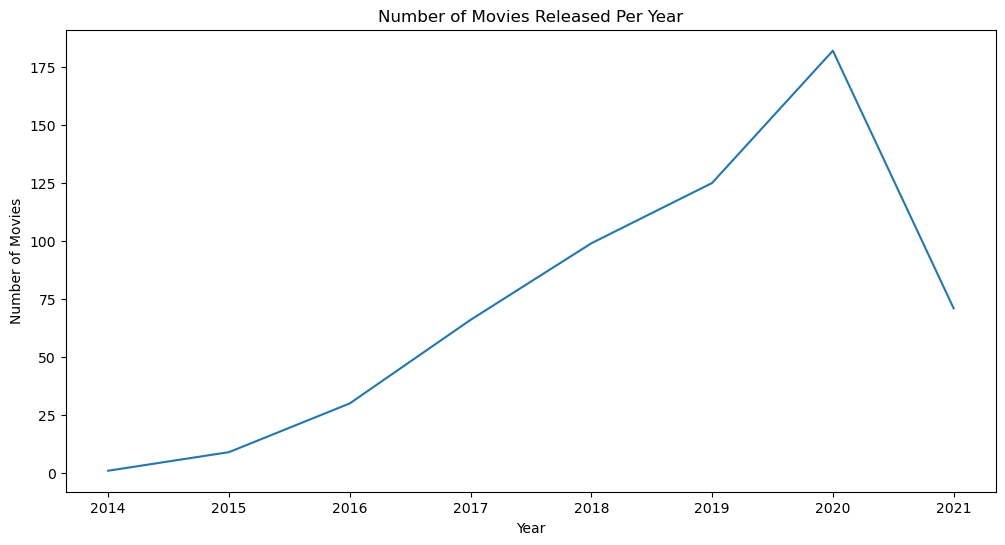

In [10]:
# Count movies per year
yearly_counts = df['year'].value_counts().sort_index()
# Plot movie releases per year
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.savefig('C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\movies per year.png', bbox_inches='tight') 
plt.show()

### Insights-

The trend shows a significant spike in movie releases in 2020, while 2014 recorded the fewest number of releases.
This refined insight provides a deeper understanding of how the pandemic-driven surge in 2020 reshaped Netflix’s movie release strategy

### 6) Which Movies with highest average runtime ?

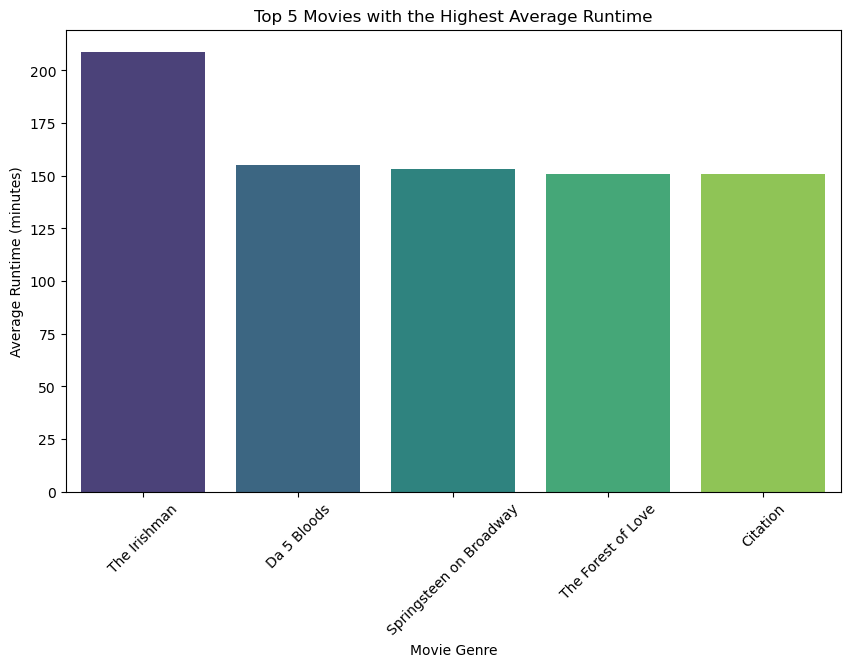


Top 5 Movies with the Highest Average Runtime:
title
The Irishman               209.0
Da 5 Bloods                155.0
Springsteen on Broadway    153.0
The Forest of Love         151.0
Citation                   151.0
Name: runtime, dtype: float64


In [11]:
avg_runtime_by_movie = df.groupby('title')['runtime'].mean()

# Get the top 5 movies with the highest average runtime
top_5_movies_title = avg_runtime_by_movie.sort_values(ascending=False).head(5)

# EDA Visualization: Bar plot of top 5 movies by average runtime
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_movies_title.index, y=top_5_movies_title.values, palette='viridis')
plt.title('Top 5 Movies with the Highest Average Runtime')
plt.xlabel('Movie Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)
plt.savefig('C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\Highest_runtime_movies.png', bbox_inches='tight') 
plt.show()

# Display the top 5 movies
print("\nTop 5 Movies with the Highest Average Runtime:")
print(top_5_movies_title)

### Insights-

The Irishman - at a staggering 209 minutes, this film is the longest on the list

### 7) In which day most of the movies are released?

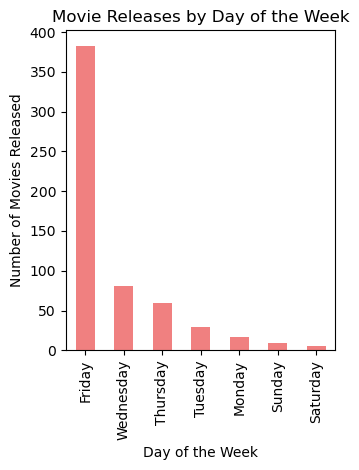

In [24]:
# Convert premiere column to datetime
df['premiere'] = pd.to_datetime(df['premiere'], errors='coerce')

# Find the day of the week with the most movie releases
df['day_of_week'] = df['premiere'].dt.day_name()
release_day_count = df['day_of_week'].value_counts()

# Bar plot for movie releases by day of the week
plt.subplot(1, 2, 2)
release_day_count.plot(kind='bar', color='lightcoral')
plt.title('Movie Releases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies Released')
plt.savefig('C:\\Internships\\Main flow and service\\Data analysis with python internship\\Task-6\\Movie_release_date.png', bbox_inches='tight') 
plt.tight_layout()
plt.show()

### Insights-

The analysis reveals that Friday is the most popular day for movie releases, with the highest number of films premiering 
on this day and Saturday is the least popular release day.


# Conclusion-

Based on the exploratory data analysis (EDA) of the Netflix dataset, we've uncovered several key insights:

Netflix’s content strategy emphasizes a broad spectrum of genres, with a notable focus on English-language films and 
documentaries, highlighting their significant presence on the platform. Additionally, the release schedule is carefully 
aligned with audience behavior, as the highest number of movies debut on Fridays, likely to maximize engagement over the 
weekend. This pattern suggests a well-timed approach to content delivery, designed to capture the peak viewing periods of 
its global audience.